## Обработка дополнительного файла.

Основная обработка и препроцессинг будут осуществляться в основном файле.  
Для дополнительного файла с макроэкономическими показателями будет проведена работа с прзнаками и заполнение na величин.

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import normalize

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
%matplotlib inline

Первичный анализ данных

In [7]:
df = pd.read_csv('project_data/attempt_4/macro.csv')

In [8]:
df.shape

(2484, 100)

In [9]:
df.head()

timestamp  oil_urals  gdp_quart  gdp_quart_growth  cpi  ppi  gdp_deflator  \
0  2010-01-01       76.1        NaN               NaN  NaN  NaN           NaN   
1  2010-01-02       76.1        NaN               NaN  NaN  NaN           NaN   
2  2010-01-03       76.1        NaN               NaN  NaN  NaN           NaN   
3  2010-01-04       76.1        NaN               NaN  NaN  NaN           NaN   
4  2010-01-05       76.1        NaN               NaN  NaN  NaN           NaN   

   balance_trade  balance_trade_growth  usdrub  ...  \
0            NaN                   NaN     NaN  ...   
1            NaN                   NaN     NaN  ...   
2            NaN                   NaN     NaN  ...   
3            NaN                   NaN  29.905  ...   
4            NaN                   NaN  29.836  ...   

   provision_retail_space_modern_sqm  turnover_catering_per_cap  \
0                              690.0                     6221.0   
1                              690.0                     6221.0   
2                              690.0                     6221.0   
3                              690.0                     6221.0   
4                              690.0                     6221.0   

   theaters_viewers_per_1000_cap  seats_theather_rfmin_per_100000_cap  \
0                          527.0                                 0.41   
1                          527.0                                 0.41   
2                          527.0                                 0.41   
3                          527.0                                 0.41   
4                          527.0                                 0.41   

   museum_visitis_per_100_cap  bandwidth_sports  population_reg_sports_share  \
0                       993.0               NaN                          NaN   
1                       993.0               NaN                          NaN   
2                       993.0               NaN                          NaN   
3                       993.0               NaN                          NaN   
4                       993.0               NaN                          NaN   

   students_reg_sports_share  apartment_build  apartment_fund_sqm  
0                      63.03          22825.0                 NaN  
1                      63.03          22825.0                 NaN  
2                      63.03          22825.0                 NaN  
3                      63.03          22825.0                 NaN  
4                      63.03          22825.0                 NaN  

[5 rows x 100 columns]

In [10]:
df.describe()

oil_urals     gdp_quart  gdp_quart_growth          cpi          ppi  \
count  2484.000000   2394.000000       2394.000000  2453.000000  2453.000000   
mean     86.467157  16993.230075          1.523726   407.808398   480.216347   
std      27.528709   3187.074480          2.875659    65.895969    70.286366   
min      29.112500   9995.800000         -4.500000   315.100000   337.200000   
25%      61.283300  14925.000000          0.400000   354.000000   438.400000   
50%     101.416500  17442.100000          1.300000   393.000000   473.500000   
75%     109.310000  19284.100000          4.100000   469.400000   520.700000   
max     122.520000  22016.100000          5.200000   531.000000   606.100000   

       gdp_deflator  balance_trade  balance_trade_growth       usdrub  \
count   2119.000000    2453.000000           2394.000000  2481.000000   
mean     110.122308      15.344006             16.846742    40.732406   
std       14.818429       3.878104             16.988727    15.006583   
min       86.721000       5.823000             -4.100000    27.276300   
25%      100.000000      12.785000              7.200000    30.508800   
50%      108.299000      16.041000             10.500000    32.316500   
75%      123.661000      18.076000             21.500000    53.752300   
max      133.160000      21.939000             75.800000    82.276400   

            eurrub  ...  provision_retail_space_modern_sqm  \
count  2481.000000  ...                         730.000000   
mean     50.444801  ...                         480.500000   
std      13.905912  ...                         209.643641   
min      37.445400  ...                         271.000000   
25%      40.242600  ...                         271.000000   
50%      42.862200  ...                         480.500000   
75%      61.323700  ...                         690.000000   
max      90.881500  ...                         690.000000   

       turnover_catering_per_cap  theaters_viewers_per_1000_cap  \
count                2191.000000                     1461.00000   
mean                 8691.922410                      580.51540   
std                  1668.967502                       37.98811   
min                  6221.000000                      527.00000   
25%                  6943.000000                      565.00000   
50%                  8522.000000                      603.00000   
75%                 10311.000000                      603.00000   
max                 10805.000000                      627.00000   

       seats_theather_rfmin_per_100000_cap  museum_visitis_per_100_cap  \
count                          2191.000000                 1461.000000   
mean                              0.443398                 1245.543463   
std                               0.016061                  162.526951   
min                               0.410000                  993.000000   
25%                               0.439390                 1240.000000   
50%                               0.450700                 1309.000000   
75%                               0.453560                 1309.000000   
max                               0.458880                 1440.000000   

       bandwidth_sports  population_reg_sports_share  \
count       1826.000000                   1461.00000   
mean      349902.577766                     25.06859   
std        72146.453110                      2.44944   
min       269768.000000                     22.37000   
25%       288177.000000                     23.01000   
50%       329348.000000                     23.01000   
75%       398451.000000                     26.70000   
max       463938.000000                     28.20000   

       students_reg_sports_share  apartment_build  apartment_fund_sqm  
count                1461.000000      1826.000000         1826.000000  
mean                   67.800034     36282.434830       230615.059255  
std                     5.168602     10761.669111         2944.879242  
min    

In [11]:
df.isna().sum()

timestamp                         0
oil_urals                         0
gdp_quart                        90
gdp_quart_growth                 90
cpi                              31
                               ... 
bandwidth_sports                658
population_reg_sports_share    1023
students_reg_sports_share      1023
apartment_build                 658
apartment_fund_sqm              658
Length: 100, dtype: int64

In [12]:
df.columns

Index(['timestamp', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'ppi',
       'gdp_deflator', 'balance_trade', 'balance_trade_growth', 'usdrub',
       'eurrub', 'brent', 'net_capital_export', 'gdp_annual',
       'gdp_annual_growth', 'average_provision_of_build_contract',
       'average_provision_of_build_contract_moscow', 'rts', 'micex',
       'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_value', 'deposits_growth',
       'deposits_rate', 'mortgage_value', 'mortgage_growth', 'mortgage_rate',
       'grp', 'grp_growth', 'income_per_cap',
       'real_dispos_income_per_cap_growth', 'salary', 'salary_growth',
       'fixed_basket', 'retail_trade_turnover',
       'retail_trade_turnover_per_cap', 'retail_trade_turnover_growth',
       'labor_force', 'unemployment', 'employment',
       'invest_fixed_capital_per_cap', 'invest_fixed_assets',
       'profitable_enterpr_share', 'unprofitable_enterpr_share',
       'share_own_revenues', 'overdue_wages_per_cap', 'fin_res_per_cap',
    

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 100 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   timestamp                                   2484 non-null   object 
 1   oil_urals                                   2484 non-null   float64
 2   gdp_quart                                   2394 non-null   float64
 3   gdp_quart_growth                            2394 non-null   float64
 4   cpi                                         2453 non-null   float64
 5   ppi                                         2453 non-null   float64
 6   gdp_deflator                                2119 non-null   float64
 7   balance_trade                               2453 non-null   float64
 8   balance_trade_growth                        2394 non-null   float64
 9   usdrub                                      2481 non-null   float64
 10  eurrub     

In [14]:
df_cat = df.select_dtypes(include=['object'])

In [15]:
df_cat.shape

(2484, 4)

In [16]:
df_cat.head()

timestamp child_on_acc_pre_school modern_education_share  \
0  2010-01-01                  45,713                    NaN   
1  2010-01-02                  45,713                    NaN   
2  2010-01-03                  45,713                    NaN   
3  2010-01-04                  45,713                    NaN   
4  2010-01-05                  45,713                    NaN   

  old_education_build_share  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [17]:
df_cat.child_on_acc_pre_school.unique()

array(['45,713', '#!', '7,311', '3,013', '16,765', nan], dtype=object)

In [18]:
df_cat.modern_education_share.unique()

array([nan, '90,92', '93,08', '95,4918'], dtype=object)

In [19]:
df_cat.old_education_build_share.unique()

array([nan, '23,14', '25,47', '8,2517'], dtype=object)

In [20]:
df_num = df.select_dtypes(exclude=['object'])

In [21]:
df_num.shape

(2484, 96)

Определим признаки в которых количество na значений превышает половину рядов для датасета.

In [22]:
for column in df.columns:
    number = df[column].isna().sum()
    if number > df.shape[0]*0.5:
        print(f'{column}, {number}')

modern_education_share, 1389
old_education_build_share, 1389
provision_retail_space_sqm, 1753
provision_retail_space_modern_sqm, 1754


Для первой итерации будем считать, что признаки, которые были возвращены предыдущей функцией могут быть удалены.
Данные для признаков не попавших в результат будут обработаны для того, чтобы заполнить пропуски. 

In [23]:
for column in df.columns:
    number = df[column].isna().sum()
    if number > 0:
        print(f'{column}, {number}')

gdp_quart, 90
gdp_quart_growth, 90
cpi, 31
ppi, 31
gdp_deflator, 365
balance_trade, 31
balance_trade_growth, 90
usdrub, 3
eurrub, 3
brent, 3
net_capital_export, 396
average_provision_of_build_contract_moscow, 365
rts, 10
micex, 10
micex_rgbi_tr, 10
micex_cbi_tr, 1
deposits_growth, 31
deposits_rate, 414
mortgage_growth, 365
grp, 658
grp_growth, 1023
income_per_cap, 293
real_dispos_income_per_cap_growth, 658
salary, 293
salary_growth, 658
retail_trade_turnover, 293
retail_trade_turnover_per_cap, 293
retail_trade_turnover_growth, 293
labor_force, 293
unemployment, 293
employment, 293
invest_fixed_capital_per_cap, 293
invest_fixed_assets, 293
profitable_enterpr_share, 658
unprofitable_enterpr_share, 658
share_own_revenues, 658
overdue_wages_per_cap, 658
fin_res_per_cap, 658
marriages_per_1000_cap, 658
divorce_rate, 658
construction_value, 658
invest_fixed_assets_phys, 658
pop_natural_increase, 293
pop_migration, 658
pop_total_inc, 658
childbirth, 293
mortality, 293
housing_fund_sqm, 658
lo

Заполним na величины.
В качестве способа заполнения для большинства признаков можно попробовать использование промежуточной величины между известными значениями.

In [24]:
for column in df.columns:
    df_fill = df.fillna(method = 'ffill')

In [25]:
for column in df.columns:
    df_fill = df_fill.fillna(method = 'bfill')

In [26]:
for column in df.columns:
    df_fill = df_fill.fillna(method = 'ffill')

In [27]:
df_fill.head()

timestamp  oil_urals  gdp_quart  gdp_quart_growth    cpi    ppi  \
0  2010-01-01       76.1     9995.8               4.1  315.1  337.2   
1  2010-01-02       76.1     9995.8               4.1  315.1  337.2   
2  2010-01-03       76.1     9995.8               4.1  315.1  337.2   
3  2010-01-04       76.1     9995.8               4.1  315.1  337.2   
4  2010-01-05       76.1     9995.8               4.1  315.1  337.2   

   gdp_deflator  balance_trade  balance_trade_growth  usdrub  ...  \
0        86.721         18.114                  14.1  29.905  ...   
1        86.721         18.114                  14.1  29.905  ...   
2        86.721         18.114                  14.1  29.905  ...   
3        86.721         18.114                  14.1  29.905  ...   
4        86.721         18.114                  14.1  29.836  ...   

   provision_retail_space_modern_sqm  turnover_catering_per_cap  \
0                              690.0                     6221.0   
1                              690.0                     6221.0   
2                              690.0                     6221.0   
3                              690.0                     6221.0   
4                              690.0                     6221.0   

   theaters_viewers_per_1000_cap  seats_theather_rfmin_per_100000_cap  \
0                          527.0                                 0.41   
1                          527.0                                 0.41   
2                          527.0                                 0.41   
3                          527.0                                 0.41   
4                          527.0                                 0.41   

   museum_visitis_per_100_cap  bandwidth_sports  population_reg_sports_share  \
0                       993.0          269768.0                        22.37   
1                       993.0          269768.0                        22.37   
2                       993.0          269768.0                        22.37   
3                       993.0          269768.0                        22.37   
4                       993.0          269768.0                        22.37   

   students_reg_sports_share  apartment_build  apartment_fund_sqm  
0                      63.03          22825.0            230310.0  
1                      63.03          22825.0            230310.0  
2                      63.03          22825.0            230310.0  
3                      63.03          22825.0            230310.0  
4                      63.03          22825.0            230310.0  

[5 rows x 100 columns]

In [28]:
df_trunc = df_fill.drop(['child_on_acc_pre_school', 'modern_education_share',  'old_education_build_share'], axis = 1)

In [29]:
for column in df_trunc.columns:
    if column != 'timestamp' and df_trunc[column].isna().sum() > 0:
        print(column)
        df_trunc[column] = df.fillna(df_trunc[column].mean())

In [30]:
for column in df_trunc.columns:
    number = df_trunc[column].isna().sum()
    if number > 0:
        print(f'{column}, {number}')

In [31]:
df_trunc.head()

timestamp  oil_urals  gdp_quart  gdp_quart_growth    cpi    ppi  \
0  2010-01-01       76.1     9995.8               4.1  315.1  337.2   
1  2010-01-02       76.1     9995.8               4.1  315.1  337.2   
2  2010-01-03       76.1     9995.8               4.1  315.1  337.2   
3  2010-01-04       76.1     9995.8               4.1  315.1  337.2   
4  2010-01-05       76.1     9995.8               4.1  315.1  337.2   

   gdp_deflator  balance_trade  balance_trade_growth  usdrub  ...  \
0        86.721         18.114                  14.1  29.905  ...   
1        86.721         18.114                  14.1  29.905  ...   
2        86.721         18.114                  14.1  29.905  ...   
3        86.721         18.114                  14.1  29.905  ...   
4        86.721         18.114                  14.1  29.836  ...   

   provision_retail_space_modern_sqm  turnover_catering_per_cap  \
0                              690.0                     6221.0   
1                              690.0                     6221.0   
2                              690.0                     6221.0   
3                              690.0                     6221.0   
4                              690.0                     6221.0   

   theaters_viewers_per_1000_cap  seats_theather_rfmin_per_100000_cap  \
0                          527.0                                 0.41   
1                          527.0                                 0.41   
2                          527.0                                 0.41   
3                          527.0                                 0.41   
4                          527.0                                 0.41   

   museum_visitis_per_100_cap  bandwidth_sports  population_reg_sports_share  \
0                       993.0          269768.0                        22.37   
1                       993.0          269768.0                        22.37   
2                       993.0          269768.0                        22.37   
3                       993.0          269768.0                        22.37   
4                       993.0          269768.0                        22.37   

   students_reg_sports_share  apartment_build  apartment_fund_sqm  
0                      63.03          22825.0            230310.0  
1                      63.03          22825.0            230310.0  
2                      63.03          22825.0            230310.0  
3                      63.03          22825.0            230310.0  
4                      63.03          22825.0            230310.0  

[5 rows x 97 columns]

In [32]:
df_trunc.shape

(2484, 97)

### Анализ полей в датасете

Построение корреляционнгой матрицы

In [110]:
corr_matrix = df_trunc.corr()

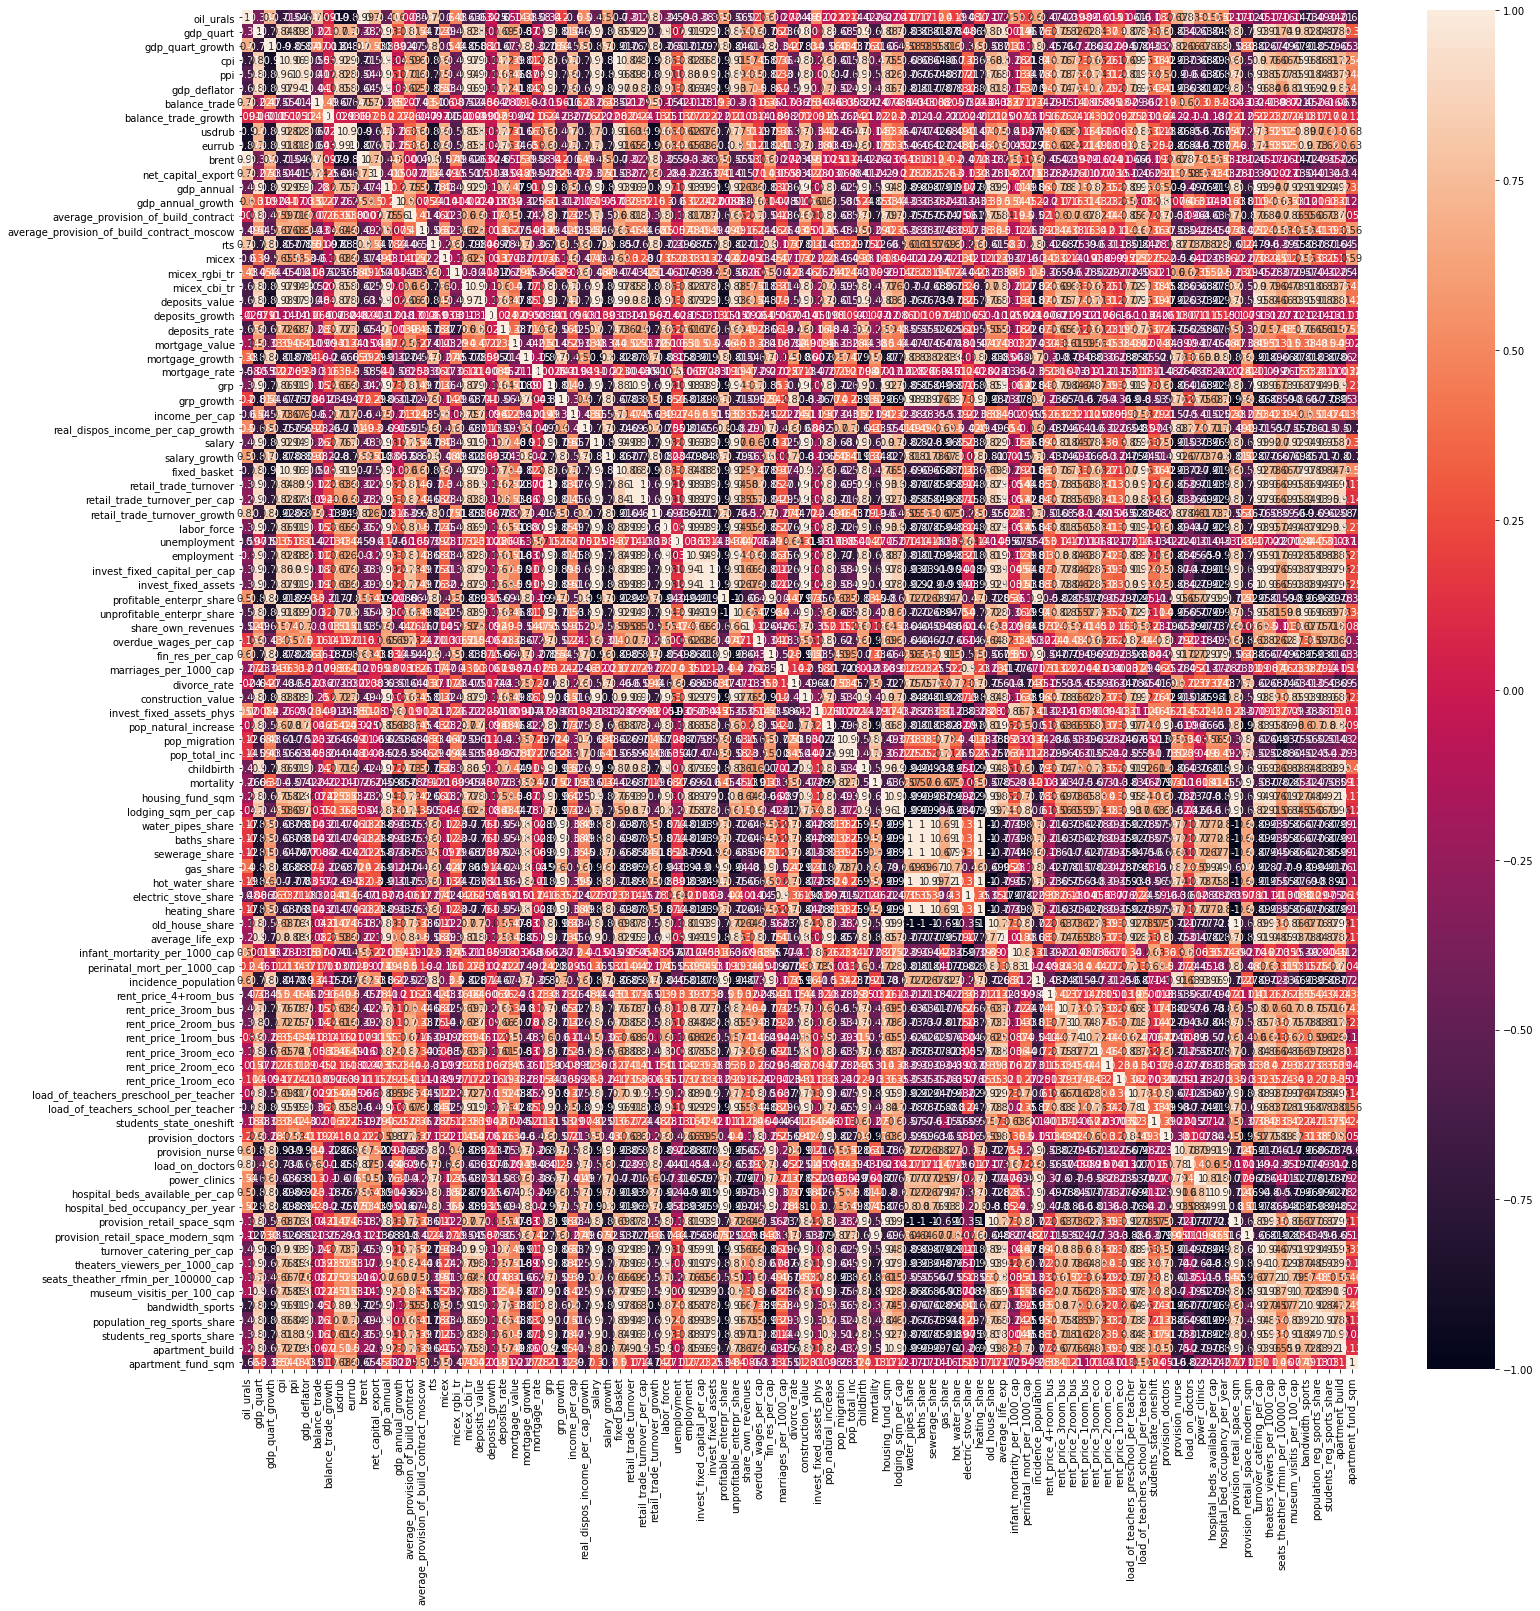

In [35]:
plt.figure(figsize=(25, 25))
ans = sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True)
figure = ans.get_figure()
figure.savefig('correlations.png', dpi=800)

In [48]:
corr_matrix.head()

oil_urals  gdp_quart  gdp_quart_growth       cpi       ppi  \
oil_urals          1.000000  -0.378311          0.698043 -0.714802 -0.543810   
gdp_quart         -0.378311   1.000000         -0.729036  0.842409  0.889446   
gdp_quart_growth   0.698043  -0.729036          1.000000 -0.900038 -0.854551   
cpi               -0.714802   0.842409         -0.900038  1.000000  0.964963   
ppi               -0.543810   0.889446         -0.854551  0.964963  1.000000   

                  gdp_deflator  balance_trade  balance_trade_growth    usdrub  \
oil_urals            -0.639539       0.750064              0.091118 -0.895852   
gdp_quart             0.872426      -0.224890              0.155653  0.703970   
gdp_quart_growth     -0.868462       0.468858             -0.010806 -0.842357   
cpi                   0.965922      -0.545208              0.050654  0.916831   
ppi                   0.935995      -0.411905              0.075393  0.817084   

                    eurrub  ...  provision_retail_space_modern_sqm  \
oil_urals        -0.870557  ...                          -0.123981   
gdp_quart         0.717866  ...                          -0.730753   
gdp_quart_growth -0.838797  ...                           0.381824   
cpi               0.913033  ...                          -0.521716   
ppi               0.812704  ...                          -0.678098   

                  turnover_catering_per_cap  theaters_viewers_per_1000_cap  \
oil_urals                         -0.447079                      -0.169009   
gdp_quart                          0.927391                       0.906489   
gdp_quart_growth                  -0.821122                      -0.673895   
cpi                                0.902920                       0.760762   
ppi                                0.928554                       0.850291   

                  seats_theather_rfmin_per_100000_cap  \
oil_urals                                   -0.158024   
gdp_quart                                    0.737545   
gdp_quart_growth                            -0.491290   
cpi                                          0.664643   
ppi                                          0.771094   

                  museum_visitis_per_100_cap  bandwidth_sports  \
oil_urals                          -0.137802         -0.725055   
gdp_quart                           0.899930          0.824106   
gdp_quart_growth                   -0.666494         -0.905980   
cpi                                 0.753669          0.962589   
ppi                                 0.850583          0.908144   

                  population_reg_sports_share  students_reg_sports_share  \
oil_urals                           -0.490904                  -0.344230   
gdp_quart                            0.844308                   0.867841   
gdp_quart_growth                    -0.847627                  -0.788571   
cpi                                  0.862096                   0.809374   
ppi                                  0.844592                   0.832909   

                  apartment_build  apartment_fund_sqm  
oil_urals               -0.210255           -0.660818  
gdp_quart                0.857050            0.299322  
gdp_quart_growth        -0.646329           -0.383256  
cpi                      0.723335            0.537204  
ppi                      0.793557            0.477490  

[5 rows x 96 columns]

In [111]:
corr_matrix[corr_matrix['oil_urals']>0.9]

oil_urals  gdp_quart  gdp_quart_growth       cpi       ppi  \
oil_urals   1.000000  -0.378311          0.698043 -0.714802 -0.543810   
brent       0.994862  -0.382626          0.699740 -0.712898 -0.542871   

           gdp_deflator  balance_trade  balance_trade_growth    usdrub  \
oil_urals     -0.639539       0.750064              0.091118 -0.895852   
brent         -0.639021       0.747501              0.096881 -0.895710   

             eurrub  ...  provision_retail_space_modern_sqm  \
oil_urals -0.870557  ...                          -0.123981   
brent     -0.870008  ...                          -0.122278   

           turnover_catering_per_cap  theaters_viewers_per_1000_cap  \
oil_urals                  -0.447079                      -0.169009   
brent                      -0.448900                      -0.173723   

           seats_theather_rfmin_per_100000_cap  museum_visitis_per_100_cap  \
oil_urals                            -0.158024                   -0.137802   
brent                                -0.155020                   -0.141718   

           bandwidth_sports  population_reg_sports_share  \
oil_urals         -0.725055                    -0.490904   
brent             -0.723101                    -0.493236   

           students_reg_sports_share  apartment_build  apartment_fund_sqm  
oil_urals                  -0.344230        -0.210255           -0.660818  
brent                      -0.349231        -0.216038           -0.651534  

[2 rows x 96 columns]

In [74]:
indices = dict()

Найдем и удалим из дтасета колонки с абсолютным значением коэффициента корреляции большим, чем 0.95

In [118]:
for column in corr_matrix.columns:
    indices[column] = corr_matrix[(corr_matrix[column]>0.95)].index.to_list()

In [119]:
corr_matrix_processed = corr_matrix.copy()

In [120]:
for k, v in indices.items():
    for value in v:
        if k == value:
            continue
        else:
            list_of_columns = corr_matrix_processed.columns
            if value in list_of_columns:
                try:
                    corr_matrix_processed = corr_matrix_processed.drop(v, axis = 1)
                    corr_matrix_processed = corr_matrix_processed.drop(v, axis = 0)
                except:
                    continue
        

In [121]:
corr_matrix_processed.head()

gdp_quart  gdp_quart_growth  balance_trade  \
gdp_quart              1.000000         -0.729036      -0.224890   
gdp_quart_growth      -0.729036          1.000000       0.468858   
balance_trade         -0.224890          0.468858       1.000000   
balance_trade_growth   0.155653         -0.010806       0.485724   
net_capital_export    -0.271990          0.532947       0.738248   

                      balance_trade_growth  net_capital_export  \
gdp_quart                         0.155653           -0.271990   
gdp_quart_growth                 -0.010806            0.532947   
balance_trade                     0.485724            0.738248   
balance_trade_growth              1.000000            0.251587   
net_capital_export                0.251587            1.000000   

                      gdp_annual_growth  average_provision_of_build_contract  \
gdp_quart                      0.308472                             0.806418   
gdp_quart_growth               0.092477                            -0.465276   
balance_trade                  0.517425                             0.069853   
balance_trade_growth           0.270616                             0.256279   
net_capital_export             0.502833                             0.076706   

                      average_provision_of_build_contract_moscow       rts  \
gdp_quart                                               0.544533 -0.723309   
gdp_quart_growth                                       -0.529273  0.807506   
balance_trade                                          -0.428246  0.512070   
balance_trade_growth                                   -0.047034 -0.097021   
net_capital_export                                     -0.210865  0.542149   

                         micex  ...  rent_price_1room_eco  \
gdp_quart             0.385801  ...              0.395155   
gdp_quart_growth     -0.502399  ...             -0.093585   
balance_trade        -0.595891  ...              0.177853   
balance_trade_growth -0.108022  ...              0.091818   
net_capital_export   -0.485420  ...              0.154473   

                      load_of_teachers_preschool_per_teacher  \
gdp_quart                                           0.874753   
gdp_quart_growth                                   -0.568494   
balance_trade                                       0.028641   
balance_trade_growth                                0.249265   
net_capital_export                                 -0.116500   

                      students_state_oneshift  provision_nurse  \
gdp_quart                            0.384693        -0.826923   
gdp_quart_growth                    -0.329369         0.824788   
balance_trade                       -0.197065         0.404443   
balance_trade_growth                 0.015615        -0.216914   
net_capital_export                  -0.292042         0.517039   

                      load_on_doctors  hospital_beds_available_per_cap  \
gdp_quart                   -0.420703                        -0.836378   
gdp_quart_growth             0.662238                         0.856866   
balance_trade                0.616840                         0.302427   
balance_trade_growth        -0.102023                        -0.184052   
net_capital_export           0.578011                         0.432388   

                      hospital_bed_occupancy_per_year  \
gdp_quart                                   -0.872031   
gdp_quart_growth                             0.842410   
balance_trade                                0.276048   
balance_trade_growth                        -0.202362   
net_capital_export                           0.430004   

                      seats_theather_rfmin_per_100000_cap  \
gdp_quart                                        0.737545   
gdp_quart_growth                                -0.491290   
balance_trade                                   -0.087489   
balance_trade_growth                             0.265968   
net_capital_export      

In [122]:
corr_matrix_processed.shape

(48, 48)

In [123]:
corr_matrix.columns

Index(['oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'ppi',
       'gdp_deflator', 'balance_trade', 'balance_trade_growth', 'usdrub',
       'eurrub', 'brent', 'net_capital_export', 'gdp_annual',
       'gdp_annual_growth', 'average_provision_of_build_contract',
       'average_provision_of_build_contract_moscow', 'rts', 'micex',
       'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_value', 'deposits_growth',
       'deposits_rate', 'mortgage_value', 'mortgage_growth', 'mortgage_rate',
       'grp', 'grp_growth', 'income_per_cap',
       'real_dispos_income_per_cap_growth', 'salary', 'salary_growth',
       'fixed_basket', 'retail_trade_turnover',
       'retail_trade_turnover_per_cap', 'retail_trade_turnover_growth',
       'labor_force', 'unemployment', 'employment',
       'invest_fixed_capital_per_cap', 'invest_fixed_assets',
       'profitable_enterpr_share', 'unprofitable_enterpr_share',
       'share_own_revenues', 'overdue_wages_per_cap', 'fin_res_per_cap',
       'marriages

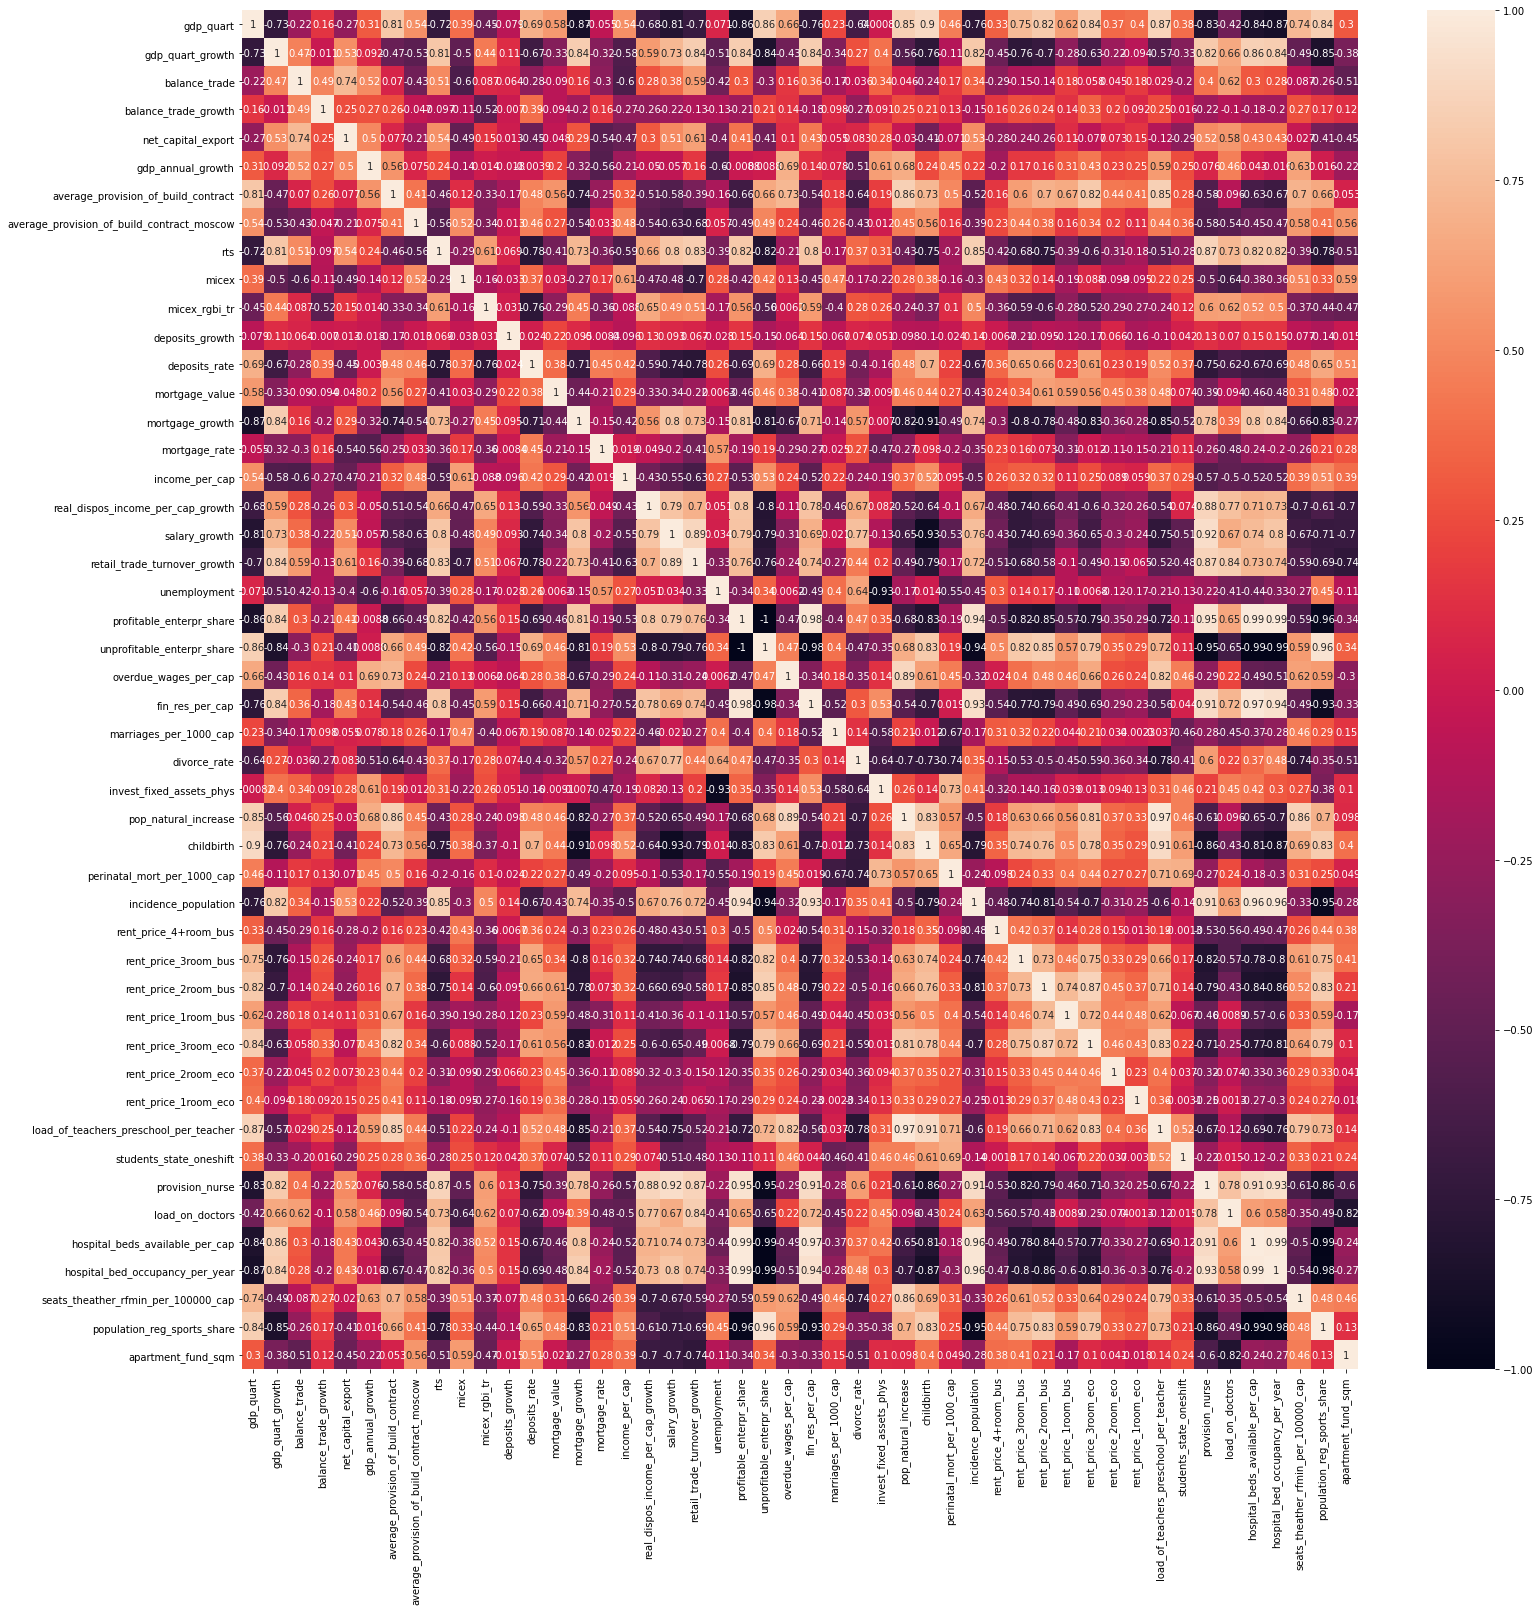

In [124]:
plt.figure(figsize=(25, 25))
ans = sns.heatmap(corr_matrix_processed, xticklabels=corr_matrix_processed.columns, yticklabels=corr_matrix_processed.columns, annot=True)
figure = ans.get_figure()
figure.savefig('correlations.png', dpi=800)

Оставим в датасете только колонки, которые показали низкий уровень прямой корреляции.

In [125]:
expected_columns = corr_matrix_processed.columns

In [140]:
expected_columns

Index(['gdp_quart', 'gdp_quart_growth', 'balance_trade',
       'balance_trade_growth', 'net_capital_export', 'gdp_annual_growth',
       'average_provision_of_build_contract',
       'average_provision_of_build_contract_moscow', 'rts', 'micex',
       'micex_rgbi_tr', 'deposits_growth', 'deposits_rate', 'mortgage_value',
       'mortgage_growth', 'mortgage_rate', 'income_per_cap',
       'real_dispos_income_per_cap_growth', 'salary_growth',
       'retail_trade_turnover_growth', 'unemployment',
       'profitable_enterpr_share', 'unprofitable_enterpr_share',
       'overdue_wages_per_cap', 'fin_res_per_cap', 'marriages_per_1000_cap',
       'divorce_rate', 'invest_fixed_assets_phys', 'pop_natural_increase',
       'childbirth', 'perinatal_mort_per_1000_cap', 'incidence_population',
       'rent_price_4+room_bus', 'rent_price_3room_bus', 'rent_price_2room_bus',
       'rent_price_1room_bus', 'rent_price_3room_eco', 'rent_price_2room_eco',
       'rent_price_1room_eco', 'load_of_teacher

In [144]:
df_final = df_trunc[['timestamp','gdp_quart', 'gdp_quart_growth', 'balance_trade',
       'balance_trade_growth', 'net_capital_export', 'gdp_annual_growth',
       'average_provision_of_build_contract',
       'average_provision_of_build_contract_moscow', 'rts', 'micex',
       'micex_rgbi_tr', 'deposits_growth', 'deposits_rate', 'mortgage_value',
       'mortgage_growth', 'mortgage_rate', 'income_per_cap',
       'real_dispos_income_per_cap_growth', 'salary_growth',
       'retail_trade_turnover_growth', 'unemployment',
       'profitable_enterpr_share', 'unprofitable_enterpr_share',
       'overdue_wages_per_cap', 'fin_res_per_cap', 'marriages_per_1000_cap',
       'divorce_rate', 'invest_fixed_assets_phys', 'pop_natural_increase',
       'childbirth', 'perinatal_mort_per_1000_cap', 'incidence_population',
       'rent_price_4+room_bus', 'rent_price_3room_bus', 'rent_price_2room_bus',
       'rent_price_1room_bus', 'rent_price_3room_eco', 'rent_price_2room_eco',
       'rent_price_1room_eco', 'load_of_teachers_preschool_per_teacher',
       'students_state_oneshift', 'provision_nurse', 'load_on_doctors',
       'hospital_beds_available_per_cap', 'hospital_bed_occupancy_per_year',
       'seats_theather_rfmin_per_100000_cap', 'population_reg_sports_share',
       'apartment_fund_sqm']]

In [145]:
df_final.head()

timestamp  gdp_quart  gdp_quart_growth  balance_trade  \
0  2010-01-01     9995.8               4.1         18.114   
1  2010-01-02     9995.8               4.1         18.114   
2  2010-01-03     9995.8               4.1         18.114   
3  2010-01-04     9995.8               4.1         18.114   
4  2010-01-05     9995.8               4.1         18.114   

   balance_trade_growth  net_capital_export  gdp_annual_growth  \
0                  14.1           -0.136524          -0.078209   
1                  14.1           -0.136524          -0.078209   
2                  14.1           -0.136524          -0.078209   
3                  14.1           -0.136524          -0.078209   
4                  14.1           -0.136524          -0.078209   

   average_provision_of_build_contract  \
0                                  5.0   
1                                  5.0   
2                                  5.0   
3                                  5.0   
4                                  5.0   

   average_provision_of_build_contract_moscow      rts  ...  \
0                                        6.02  1553.06  ...   
1                                        6.02  1553.06  ...   
2                                        6.02  1553.06  ...   
3                                        6.02  1553.06  ...   
4                                        6.02  1553.06  ...   

   rent_price_1room_eco  load_of_teachers_preschool_per_teacher  \
0                 27.58                              721.477765   
1                 27.58                              721.477765   
2                 27.58                              721.477765   
3                 27.58                              721.477765   
4                 27.58                              721.477765   

   students_state_oneshift  provision_nurse  load_on_doctors  \
0                  89.0495             99.4      7872.848285   
1                  89.0495             99.4      7872.848285   
2                  89.0495             99.4      7872.848285   
3                  89.0495             99.4      7872.848285   
4                  89.0495             99.4      7872.848285   

   hospital_beds_available_per_cap  hospital_bed_occupancy_per_year  \
0                            846.0                            302.0   
1                            846.0                            302.0   
2                            846.0                            302.0   
3                            846.0                            302.0   
4                            846.0                            302.0   

   seats_theather_rfmin_per_100000_cap  population_reg_sports_share  \
0                                 0.41                        22.37   
1                                 0.41                        22.37   
2                                 0.41                        22.37   
3                                 0.41                        22.37   
4                                 0.41                        22.37   

   apartment_fund_sqm  
0            230310.0  
1            230310.0  
2            230310.0  
3            230310.0  
4            230310.0  

[5 rows x 49 columns]

После предварительного применения моделей, часть признаков будут исключены из финального датасета.

In [146]:
df_final.to_pickle('macroeconomic.pkl')